In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

### Import Numerical User Data

In [2]:
df = pd.read_csv('./2000/2000_num_per_user.csv', index_col=[0])

In [3]:
df.drop(index=' #LoveEllie', inplace=True)

In [4]:
df.drop(index = ['What do you use your mason jar for?', '_' ], inplace=True)

In [5]:
df = df[['post_followers']]

In [6]:
df.index = df.index.astype(float)

### Import category data

In [7]:
df_cat = pd.read_csv('cos_sim_cat.csv', index_col=[0])

In [8]:
df_cat.reset_index(inplace=True )

### Import NLP Vectorized data

In [9]:
df_text_similarity = pd.read_csv('./2000/2000_similarity_index.csv', index_col=[0])

In [10]:
df_text_similarity.drop(index=' #LoveEllie', inplace=True)

In [11]:
df_text_similarity.drop(columns=' #LoveEllie', inplace=True)

In [12]:
df_text_similarity = df_text_similarity.astype(dtype='float')

In [13]:
df_text_similarity.reset_index(inplace=True, )

In [14]:
df_text_similarity.rename(index=str, columns={'index': "id"}, inplace=True)

### Import Image Data

In [15]:
df_image_similarity = pd.read_csv('./2000/2000_cos_sim_images.csv', index_col=[0])

In [16]:
df_image_similarity = df_image_similarity.astype(dtype='float')

In [17]:
df_image_similarity.reset_index(inplace=True )

In [18]:
df_image_similarity.rename(index=str, columns={'index': "id"}, inplace=True)

In [19]:
df_img = pd.read_csv('per_post_image.csv')

In [20]:
df_text = pd.read_csv('per_user_text.csv')

## Final Recommend

The final reccomendation will combine the all values and perform a cosine similarity measurement to determine the users closest across all dimensions. 

In [24]:
def recomend(user, qty_of_results, follower_min, follower_max):
    try:
        df3 = pd.DataFrame(df, copy=True)
        df3.reset_index(inplace=True)
        df3.id = df3.id.astype(int)
        df3 = pd.merge(df3, df_text_similarity[['id', str(user)]], how='left', on='id')
        df3 = pd.merge(df3, df_cat[['id', str(user)]], how='left', on='id', suffixes=('_text', '_cat'))
        df4 = pd.merge(df3, df_image_similarity[['id', str(user)]], how='left', on='id')
        df4.fillna(0, inplace=True)
        df4['temp_sum_results'] = df4.iloc[:, [2,3,4]].sum(axis=1)
        return df4[(df4.post_followers > follower_min)& (df4.post_followers < follower_max)].nlargest(n=qty_of_results, columns='temp_sum_results', keep='all'), user
    except:
        print('There is no data for user {} to compare against.'.format(user))

### Test

Call the reccomend function with a user to view a list of the closest users.

26502, 72119, 82, 31498, 12682, 75712

In [25]:
rec, target = recomend(26502, 10, 0, 20000000)
rec.head(6)

id  post_followers  26502_text  26502_cat     26502  temp_sum_results
1195  36161         15710.0    0.803690   1.000000  0.339683          2.143373
1127  30439         61720.0    0.807839   1.000000  0.214834          2.022674
87     5911         33849.0    0.827651   0.577350  0.466850          1.871851
147   10433         55963.0    0.731390   0.707107  0.389643          1.828140
374   39961           668.0    0.623280   1.000000  0.148916          1.772196
1368  47141          5570.0    0.698062   0.707107  0.358554          1.763724




This is the target user: 26502



Target user text: 
  “You are my calm my storm and everything in between”- @jironword [] [alovelycreative_kelsey briantaylor___] A little double exposure magic in the desert✨just got my film scans back from Stephanie  Miguel’s ultra sweet engagement session in Joshua Tree and cannot wait to share more [] [reformation infest stephychz23 goodmanfilmlab] The most incredible al fresco seaside dinner designed by @lovelyfest at @montagelaguna for MB’s wedding Floral design by @idlewildfloral linens by @latavolalinen tabletop rentals by @casadeperrin rentals by @foundren


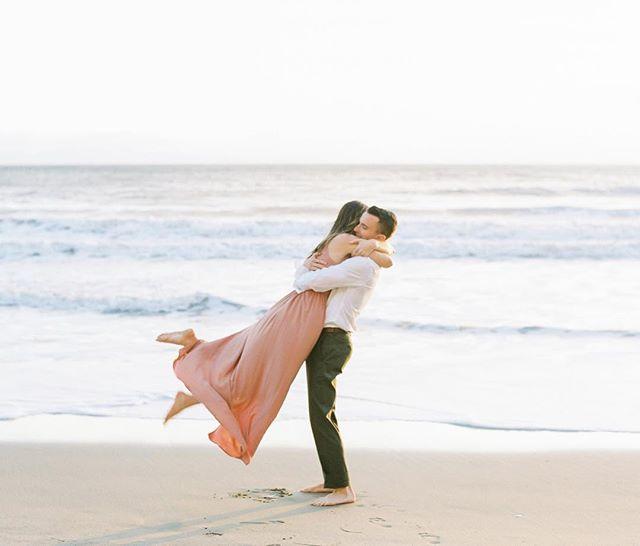

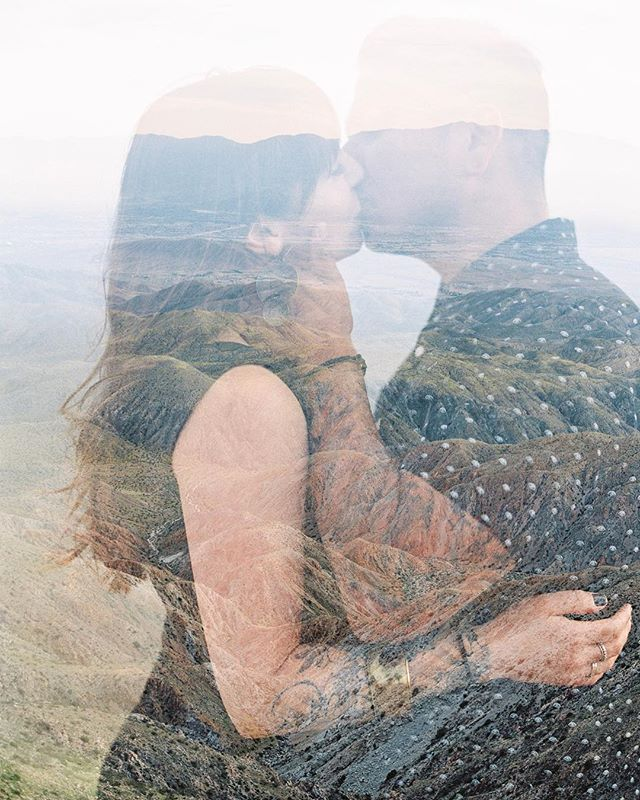

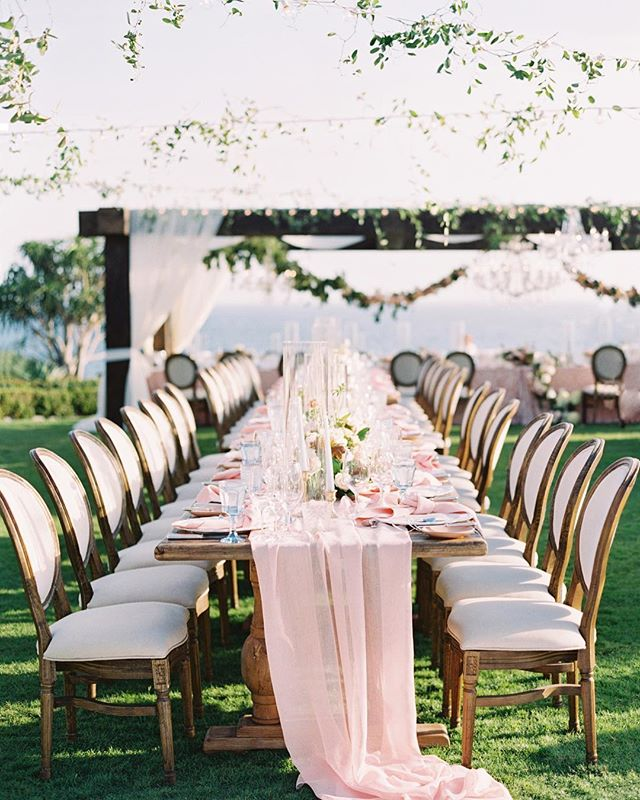

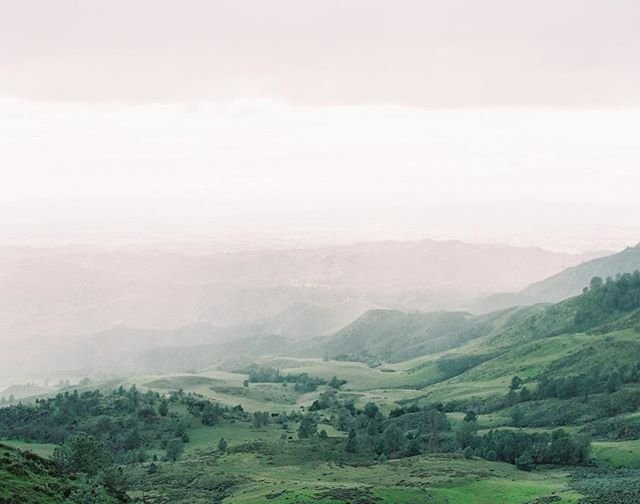

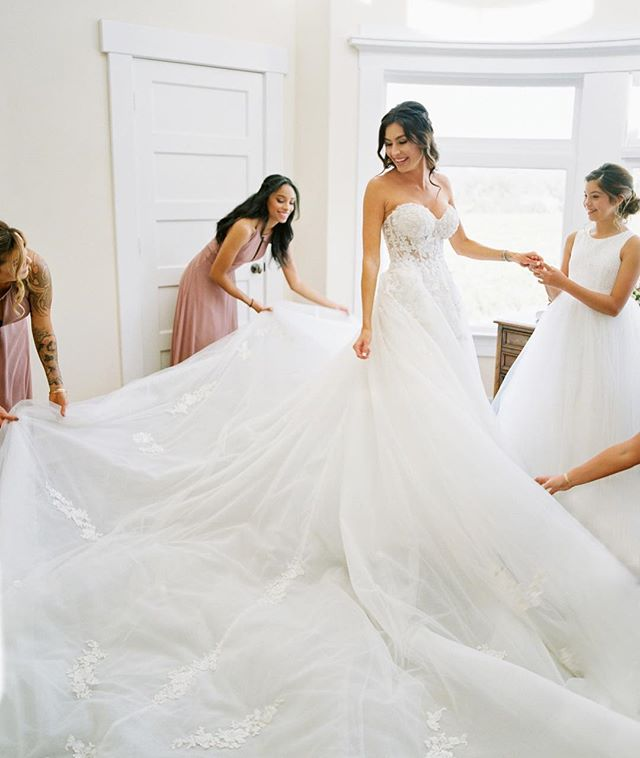

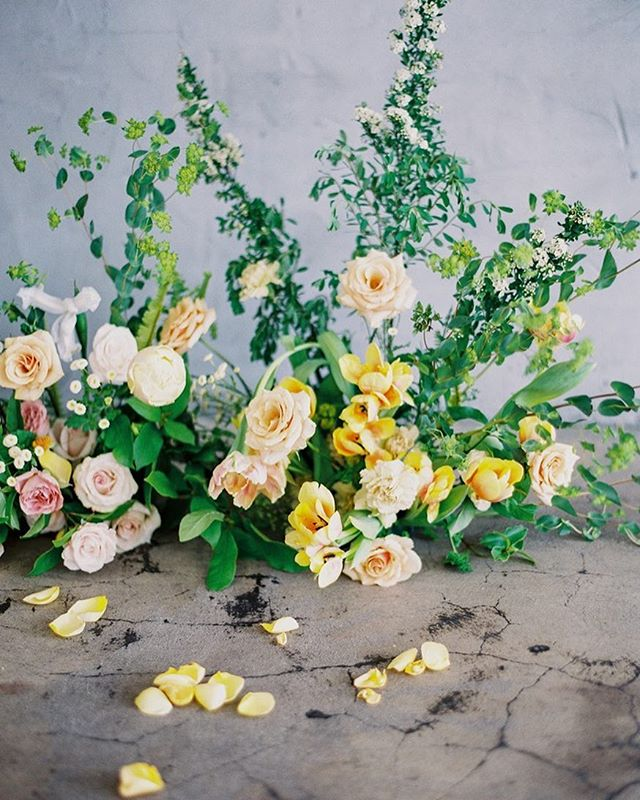

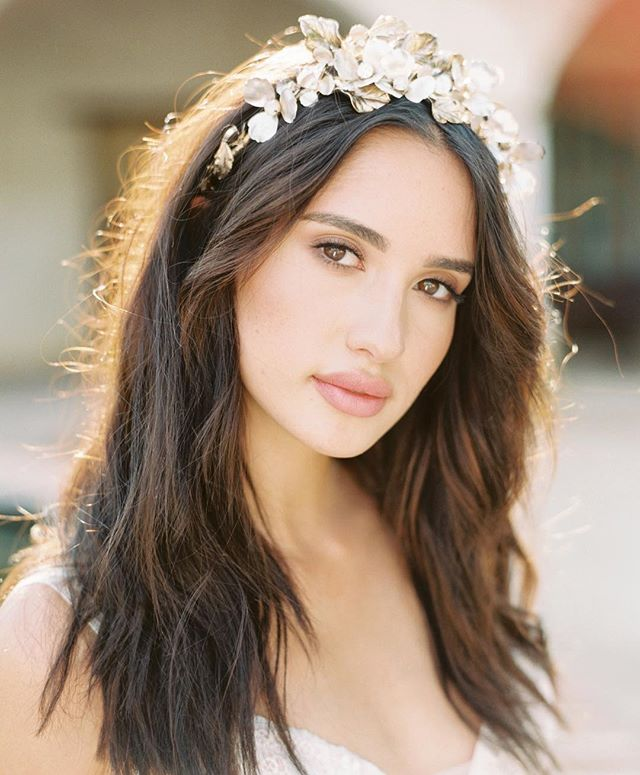

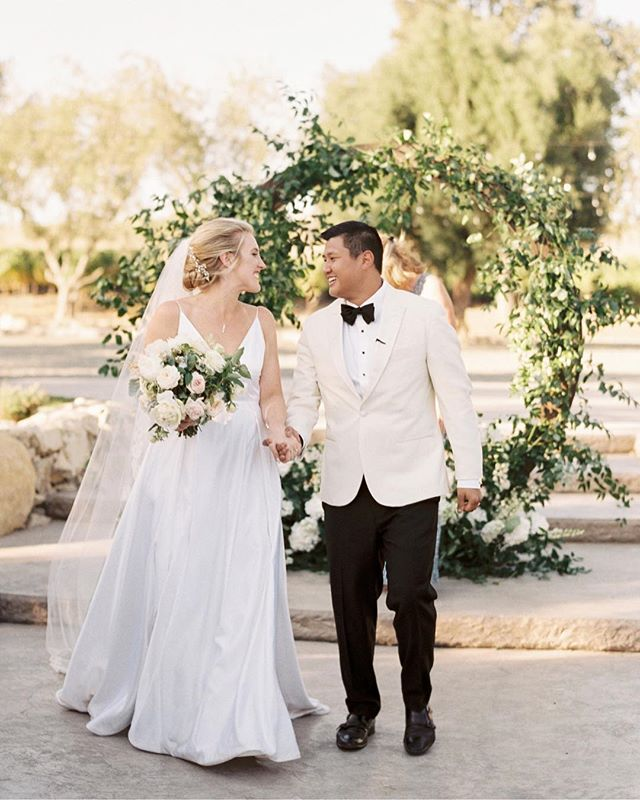

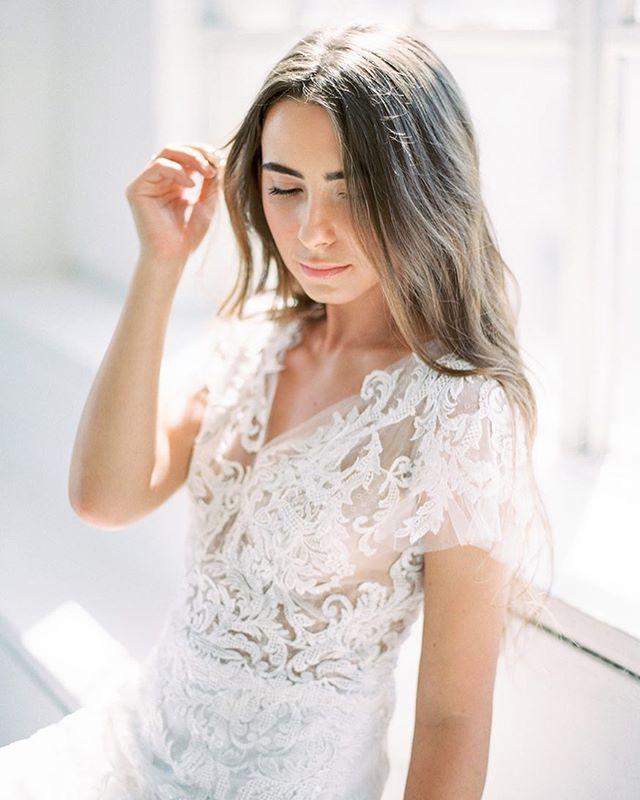

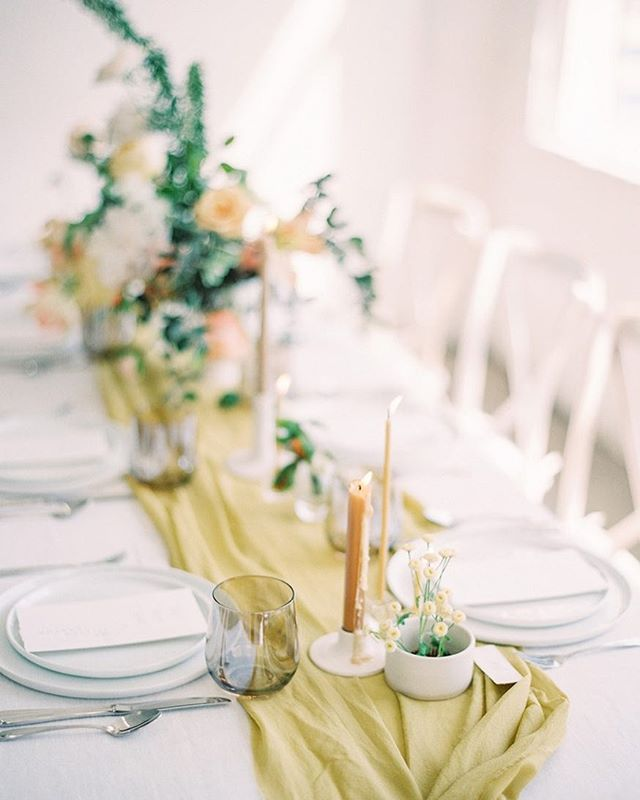

In [26]:

print('\n\n\nThis is the target user:', target)
print('\n\n\nTarget user text: \n', df_text.loc[df_text['id'] == 26502]['all_text'].values[0][0:550])

for i in df_img.loc[df_img['id'] == target]['image'].head(10):
    url = i
    img = Image(url, format = 'jpeg', width=224, height=224)
    display(img)





Here are a couple of photos from user:  36161


 User: 36161 
  It’s our 5 year wedding anniversary in May Whoa To celebrate we want to take a road trip Where should we go Comment below with your favorite road trip spots please// also how cute is this camera strap by @shop_jolielaide  Taking photos is just way m


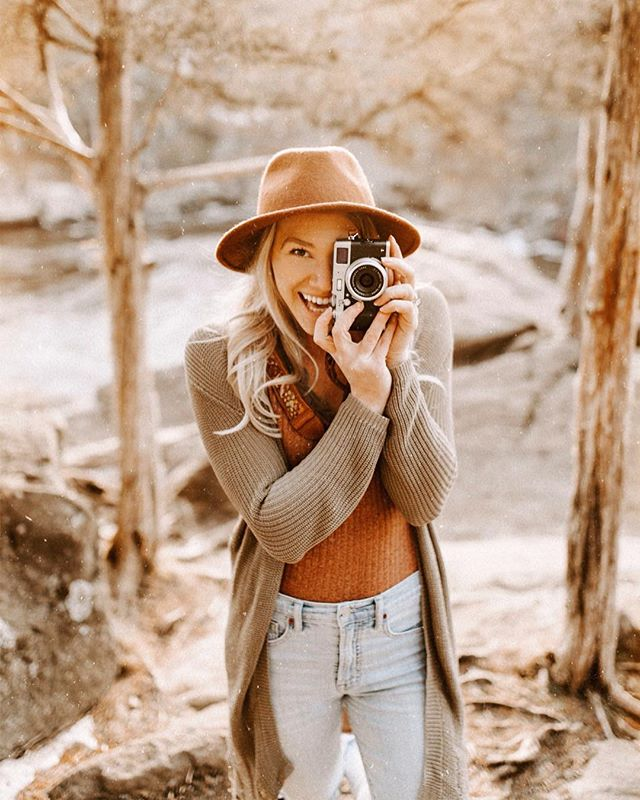

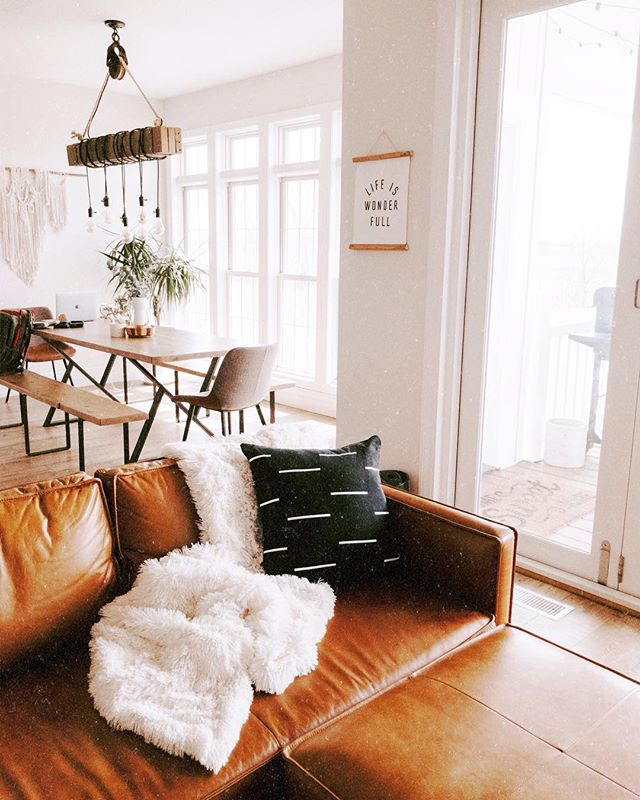

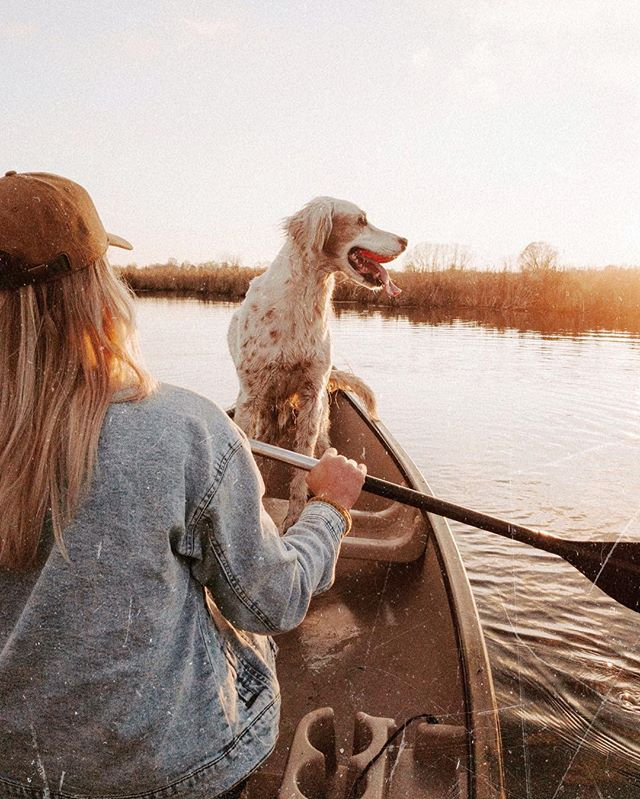





Here are a couple of photos from user:  30439


 User: 30439 
 Landscape and travel photography by San Francisco based photographer Lisa Bao A year ago I was completely lost I felt like I was living the same day over and over again feeling complacent and unfulfilled It wasn't until I took a trip to a place that 


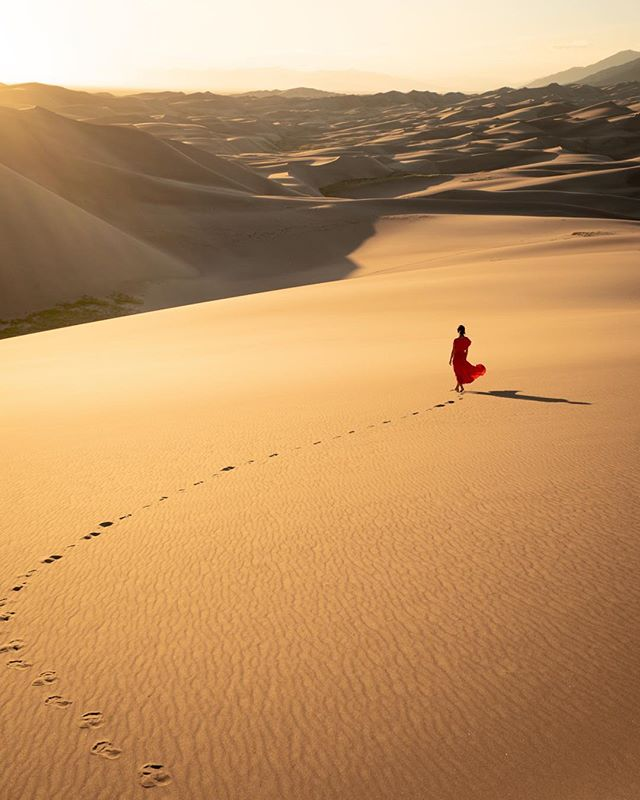

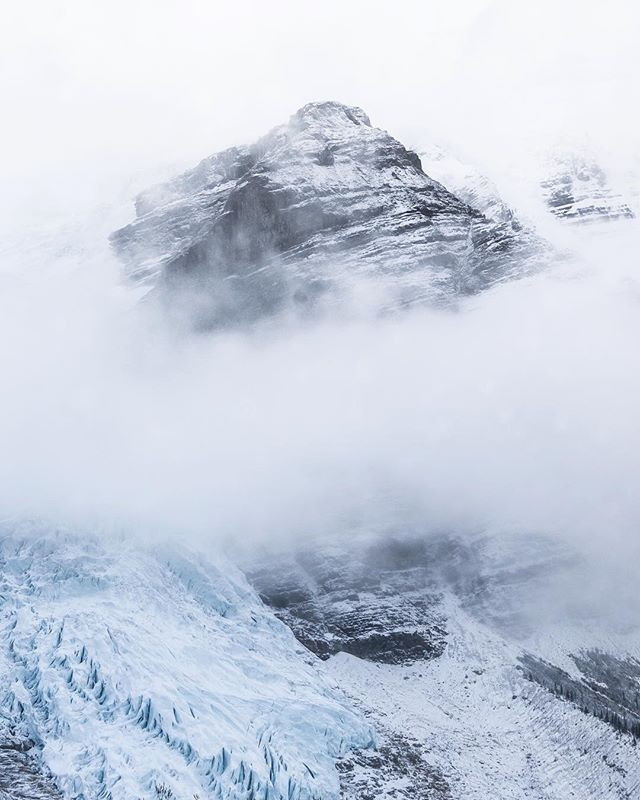

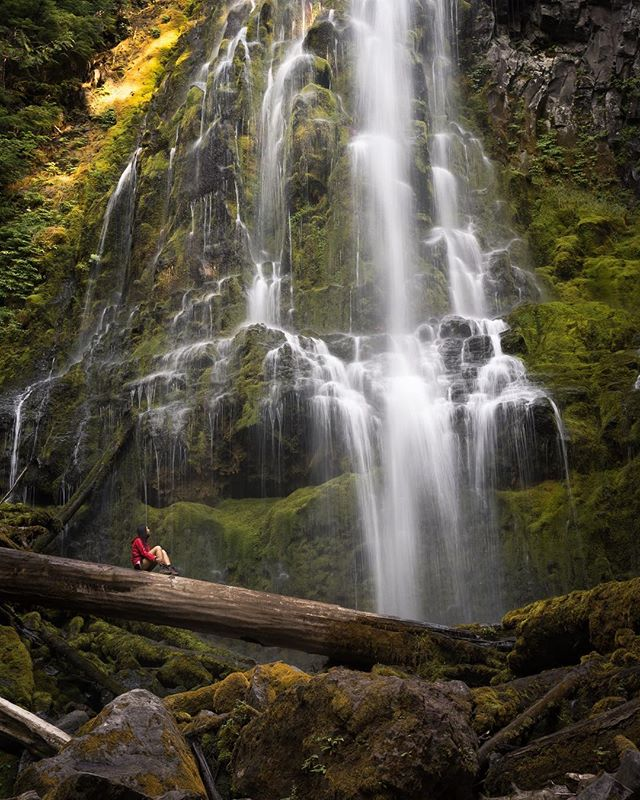





Here are a couple of photos from user:  5911


 User: 5911 
 The Elysian Edit is a design culture and lifestyle website founded by designer and creative director Jessica Comingore The website is dedicated to the art of refined living and built on the idea that modest intentional design can help enrich our live


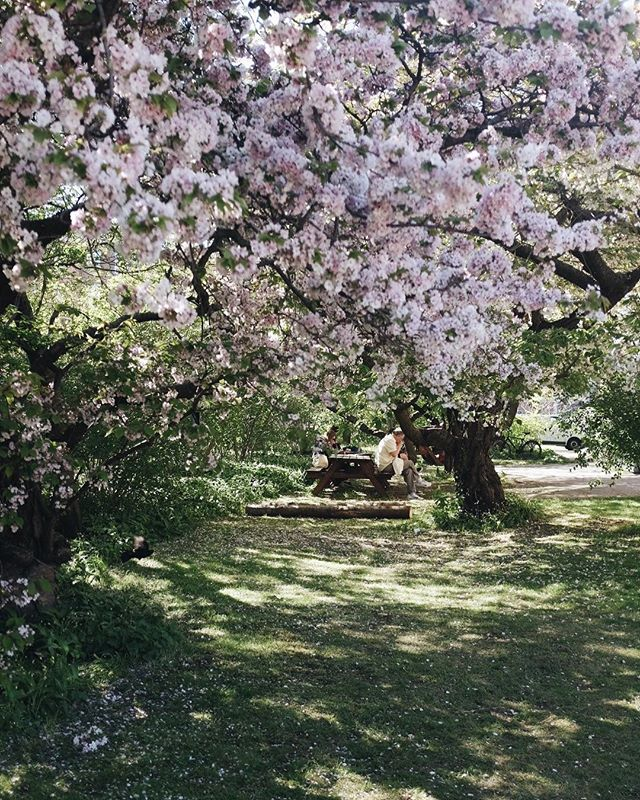

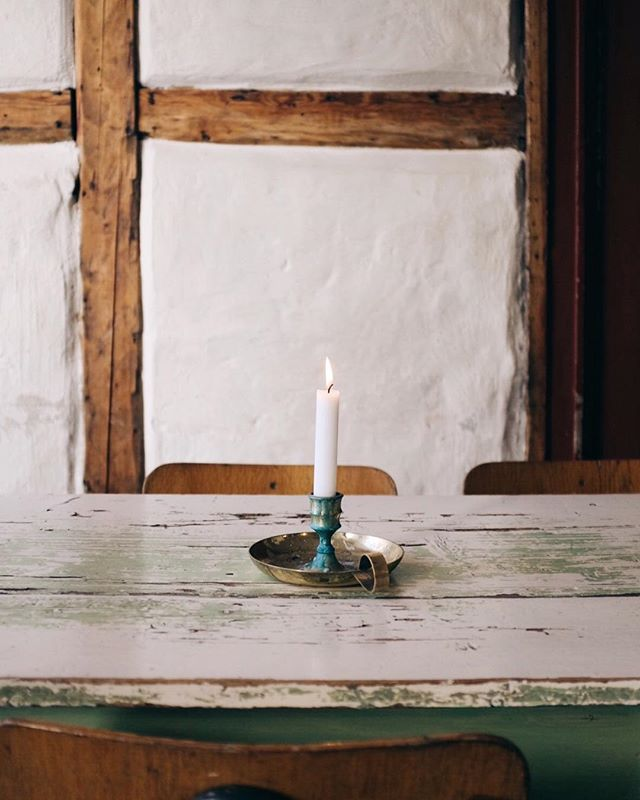

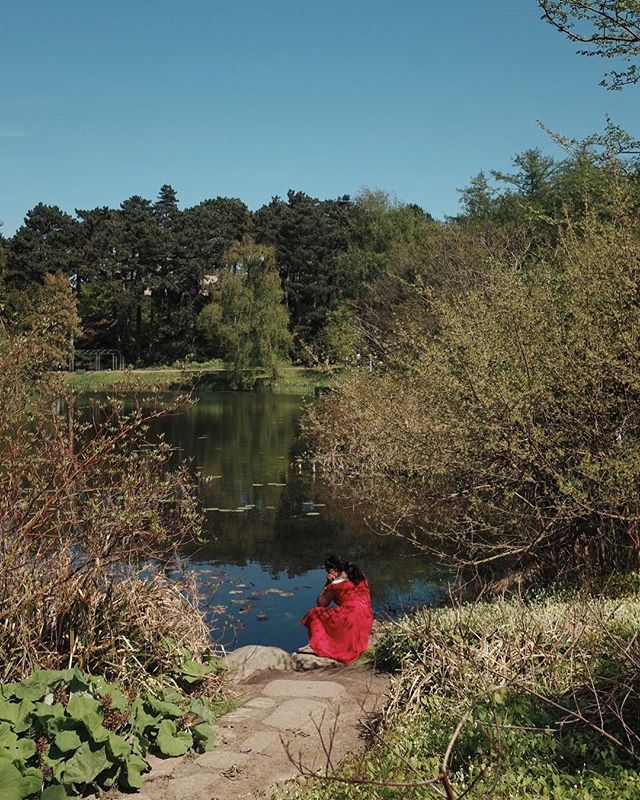





Here are a couple of photos from user:  10433


 User: 10433 
 The Green Life is a bilingual blog focused on plant-based whole-food seasonal recipes The recipes are mostly vegan often gluten-free and always made with the most natural wholesome nourishing ingredients One to two new recipes inspired by the seasons


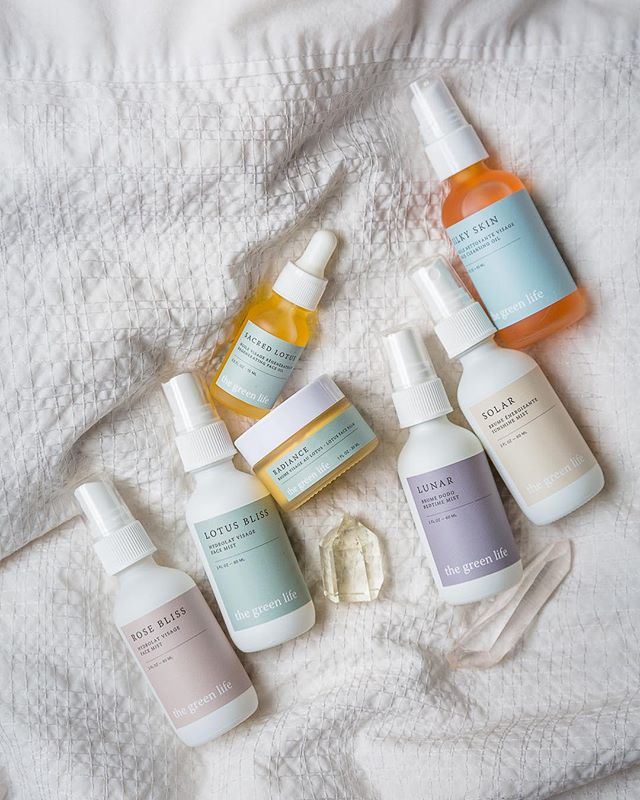

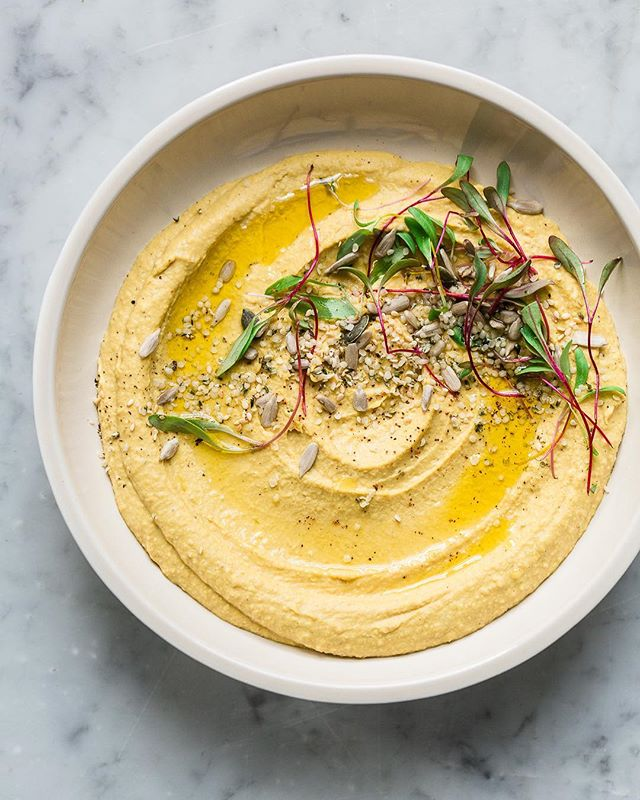

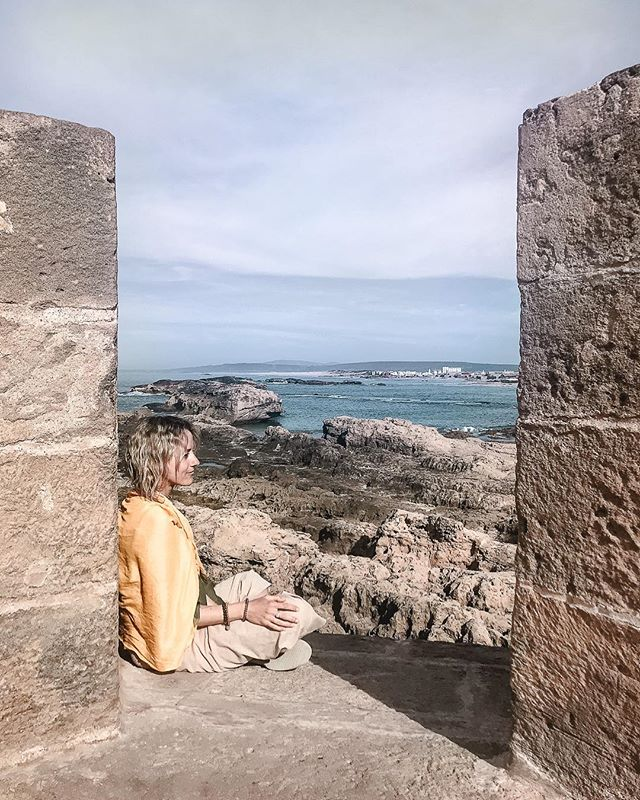





Here are a couple of photos from user:  39961


 User: 39961 
 Outdoor/luxury travel and adventure photography                                                                                                                                                                                                           


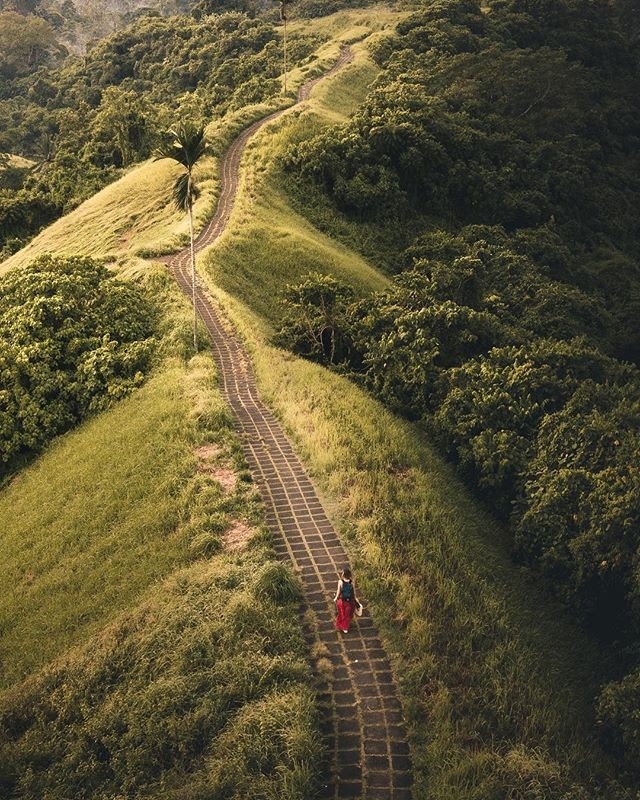

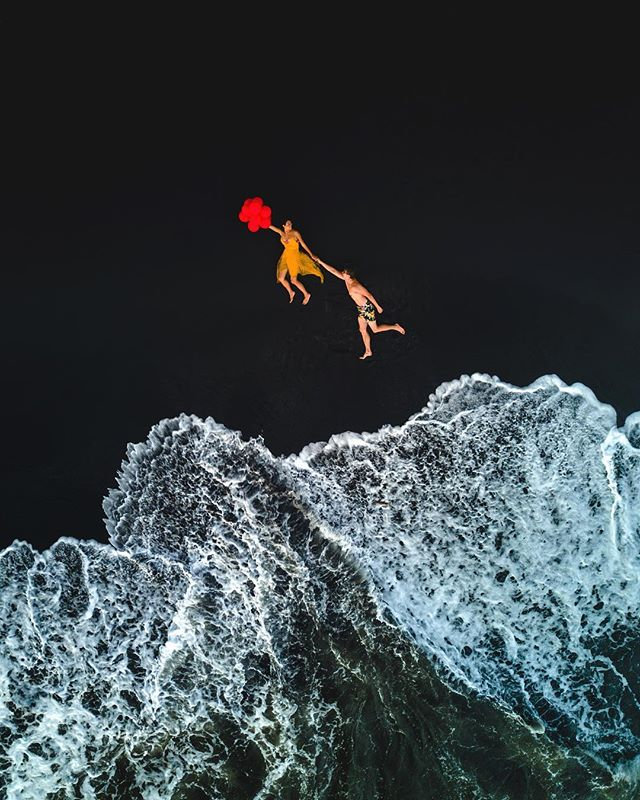

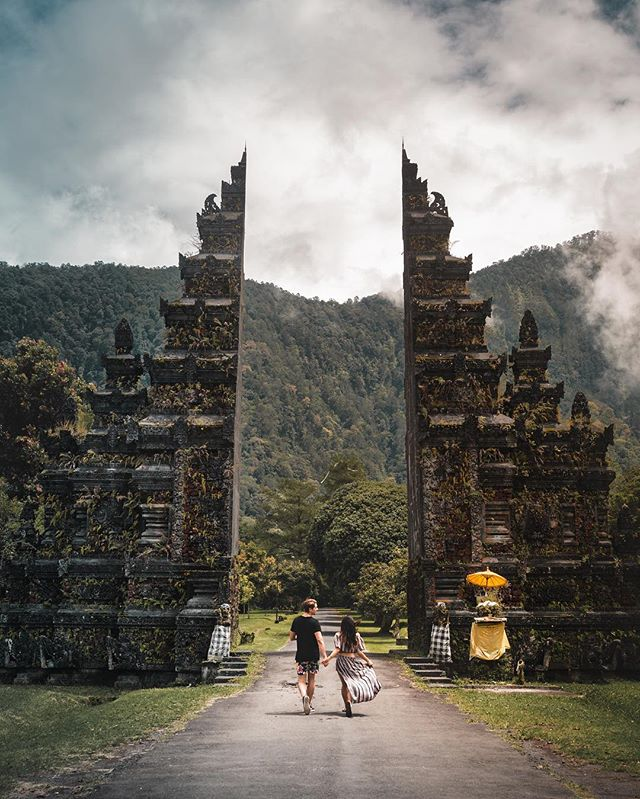





Here are a couple of photos from user:  47141


 User: 47141 
 Destination Wedding Photographer Notre Dame 😟😞😣notredamedeparis [notredamedeparis] [] Mangalyam tantunanena mama jivana hethuna Kanthe badhnami subhage twam jeeva sarada satam - “this sacred thread - mangal sutra - is being tied around your neck for 


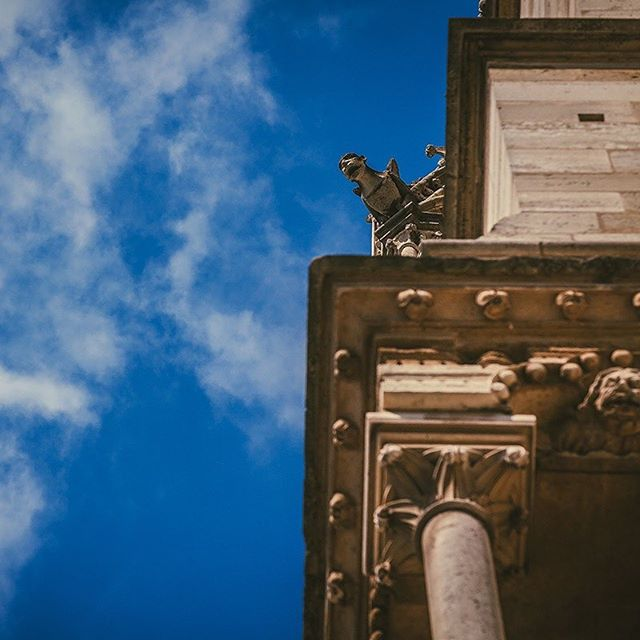

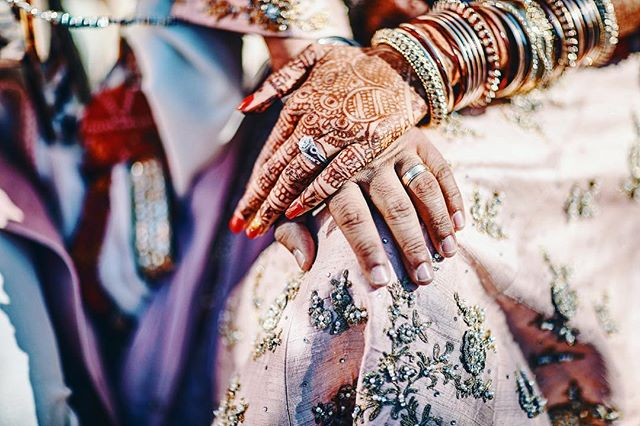

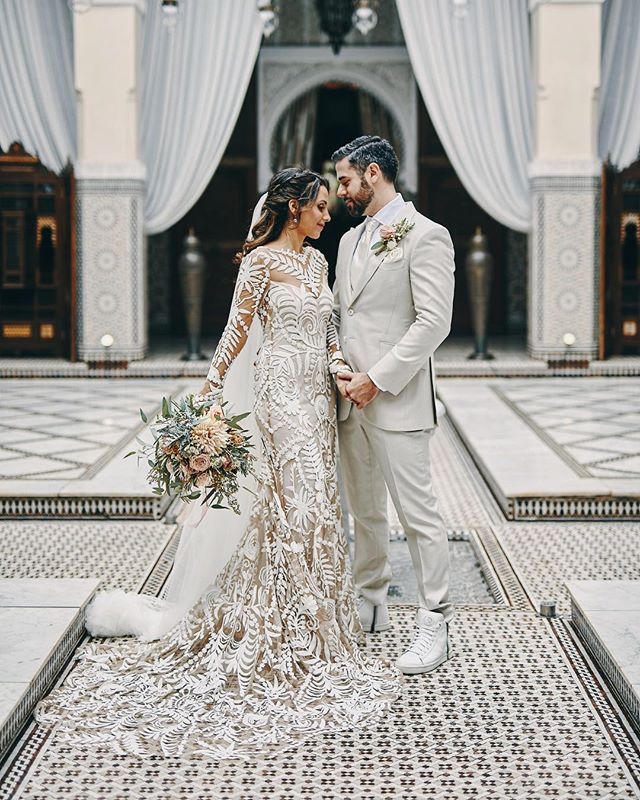





Here are a couple of photos from user:  19404


 User: 19404 
         Hello I’m Claire a Los Angeles native with a passion for storytelling unique compositions and bright colors I’ve been an artist my entire life first discovering my love of photography at 13 when I was given a 35mm film camera Since then I’ve 


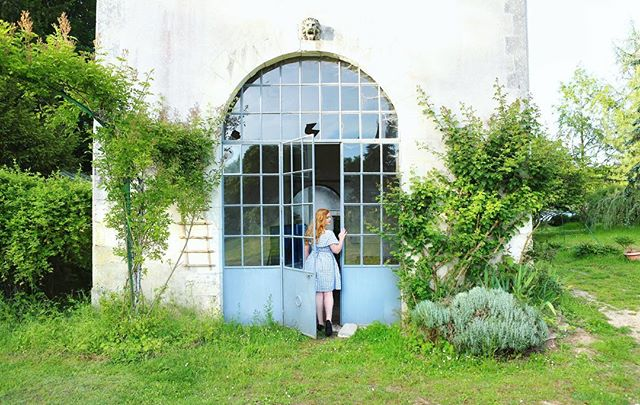

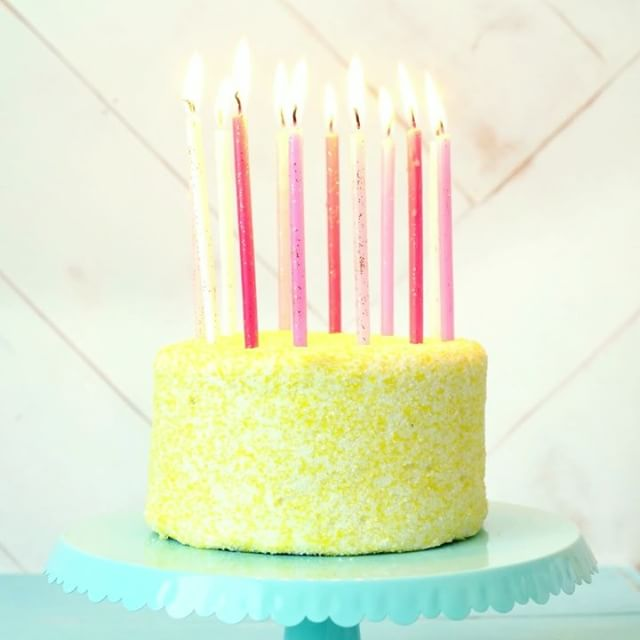

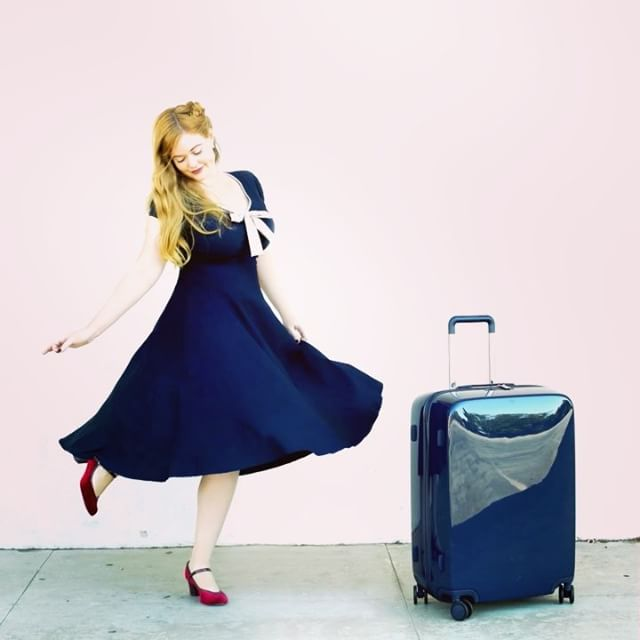





Here are a couple of photos from user:  36311


 User: 36311 
  It’s always a glowing getaway with Soleildelamer | One of my favorites from a summer story with @shawna_blackburn @lucianochiarello @edgarmosa | creative production  photography for @lamer [soleildelamer] [lamer] the emergence of human creativity []


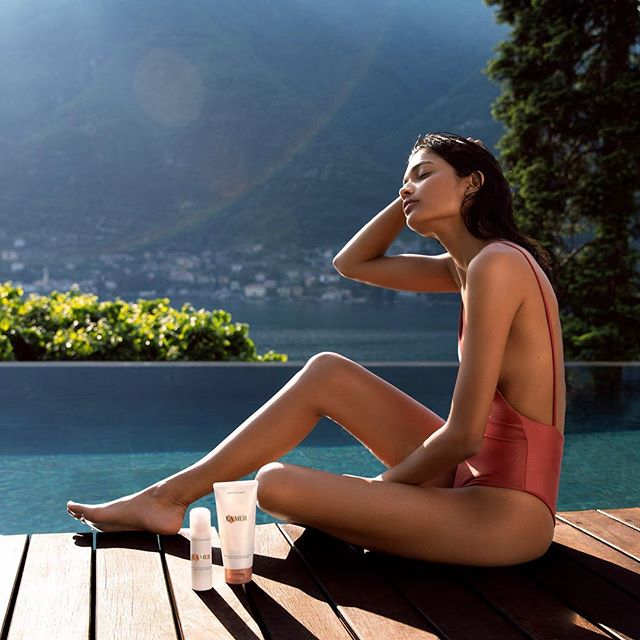

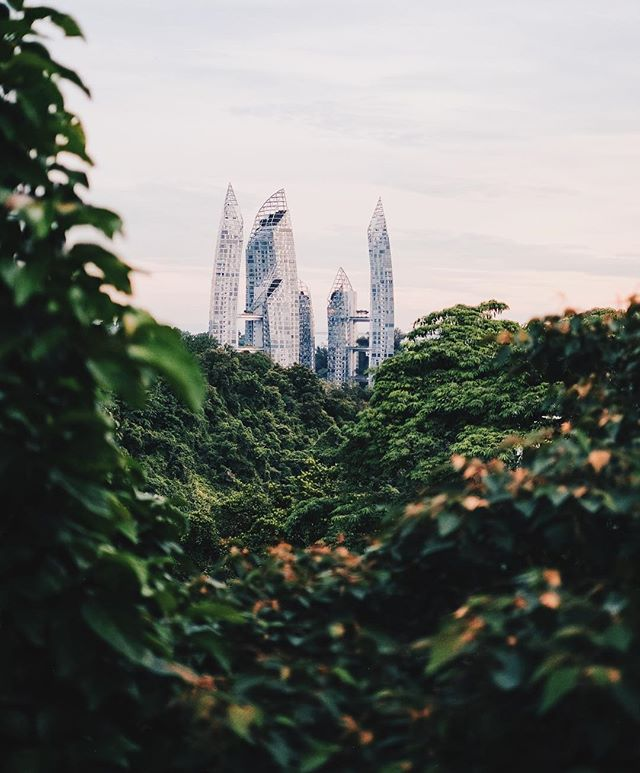

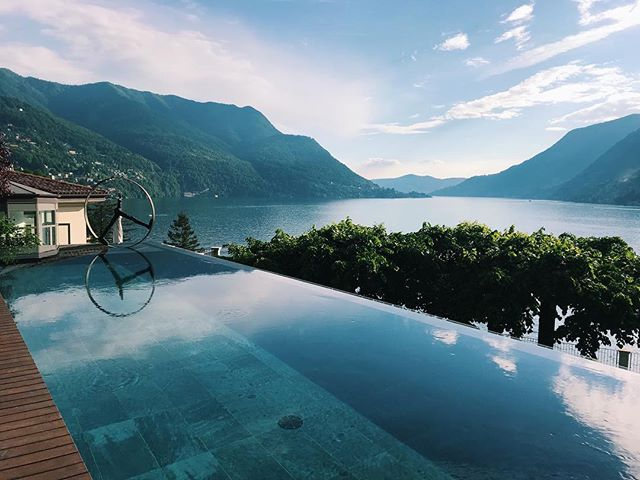





Here are a couple of photos from user:  7674


 User: 7674 
 Teri has worked in Corporate America for over 15 years creating successful companies including creating and selling her own online marketing company Traveling full-time for the last 5 years she received hundreds of requests from Gen-X American friend


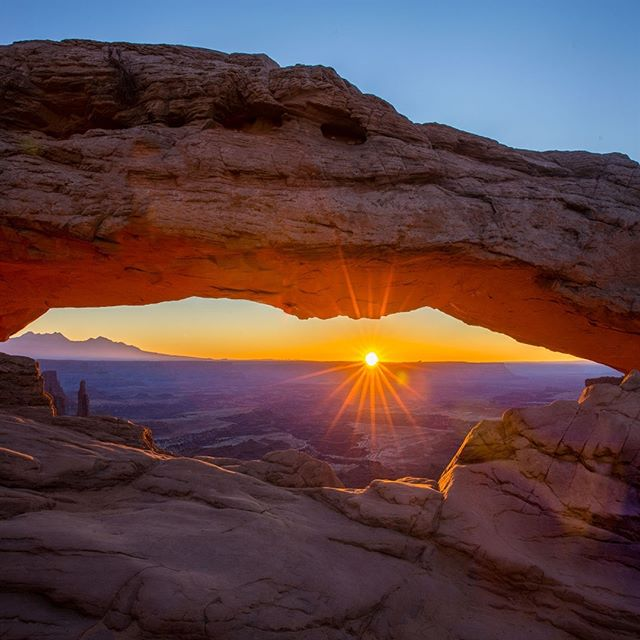

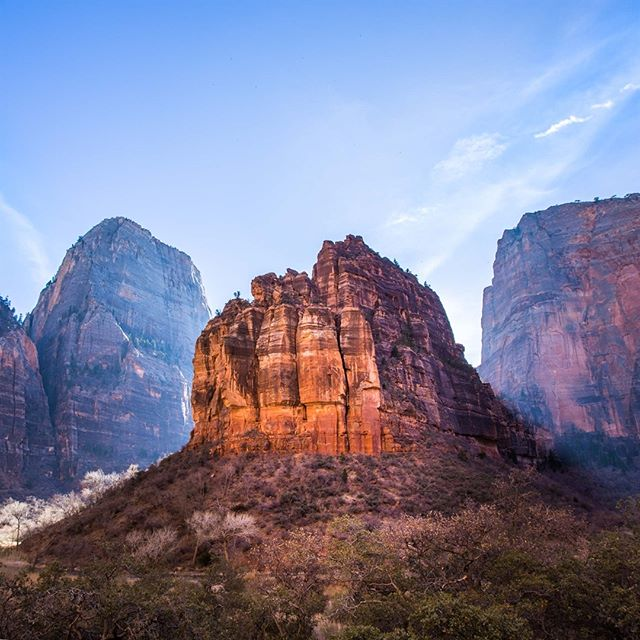

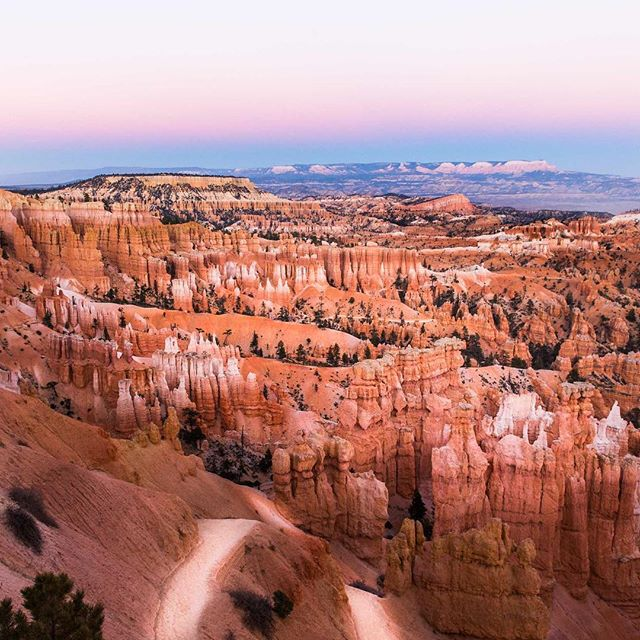





Here are a couple of photos from user:  38613


 User: 38613 
 @anitabanushi  Happy Easter to everyone celebrating today 🐰IvySaylor Easter easterholidays  kidsfashionblogger kidsfashion kidsstylist love kids beautiful fun eastershoot lasteaster babygirl baby [kidsstylist eastershoot lasteaster easterholidays eas


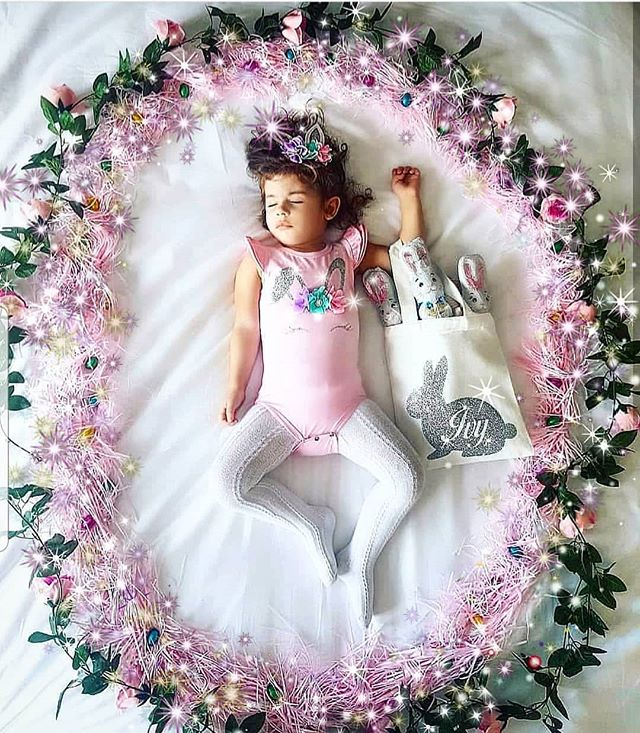

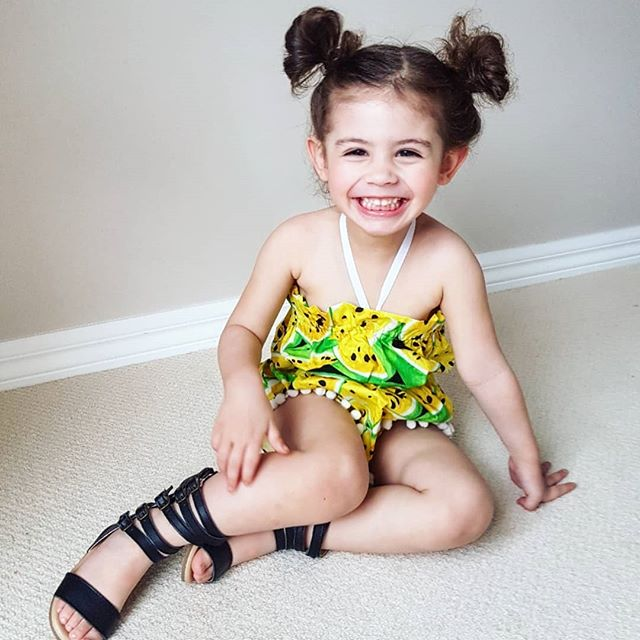

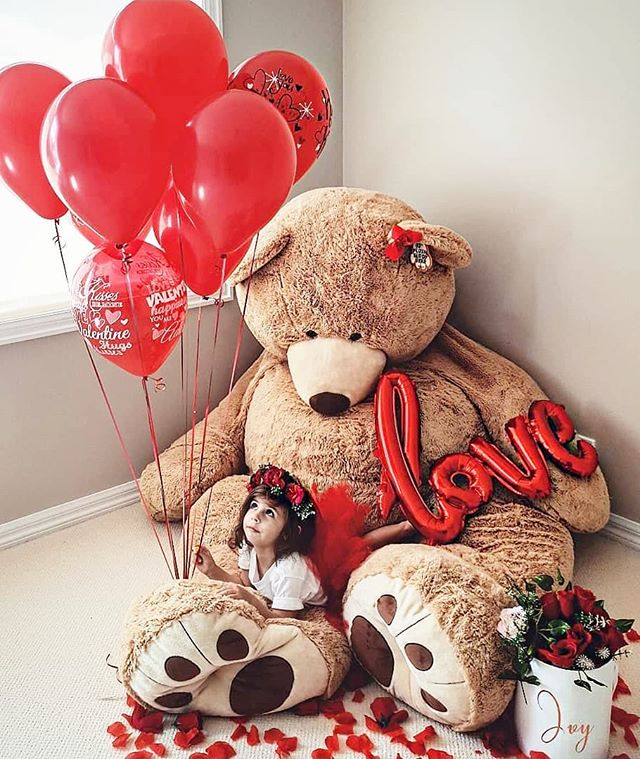

In [27]:
rec_list = rec.id
for x in rec_list:
    print('\n\n\n\nHere are a couple of photos from user: ', x)
    print("\n\n User:", x, '\n', df_text.loc[df_text['id'] == x]['all_text'].values[0][0:250])
    df2  = df_img.loc[df_img['id'] == x]
    image_list = df2['image'].head(3)
    for i in image_list:
        url = i
        img = Image(url, format = 'jpeg', width=224, height=224)
        display(img)